In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

from data import data as dta

In [2]:
def pathMaker(model, optim, epochs,size,boolean):
    return "model%swithOptimoo%s-epochs%s-batch-size%s-relational-batch%s.csv" % (model, optim, epochs, size,boolean)

In [3]:
def latext(model, batch, results):
    return \
        "\\begin{table}[h!]" + "\n    " + \
        "\\begin{footnotesize}" + "\n    " + \
        "\\begin{center}" + "\n    " + \
        "\\begin{tabular}{l|cc:cc:cc}" + "\n    " + \
        "\\toprule" + "\n    " + \
        "Dataset               &   SGD           & SGD \\& \\tecnameAbrv & Adagrad & Adagrad \\& \\tecnameAbrv & Adam        & Adam \\& \\tecnameAbrv \\\\"+ "\n    " + \
        "\\midrule" + "\n"  + \
        results  + "\n    " + \
        "\\bottomrule"  + "\n    " + \
        "\\end{tabular}" + "\n    " + \
        "\\caption{Results with " + str(model) + " and batch of " + str(batch) + "}" + "\n    " + \
        "\\label{tab:results" + str(model).upper() +str(batch)+ "}" + "\n    " + \
        "\\end{center}" + "\n    " + \
        "\\end{footnotesize}" + "\n" + \
        "\\end{table}"


In [4]:
results = {}
models = dta.models # ["mlp", "resnet"]
optims = dta.optims # ["SGD","adagrad", "adam"]
bools = ["False", "True"]
sizes = dta.batch_sizes # ["1", "8", "32", "128"]


dirAbrv = {
                "Adult_Income":    "ACI         ", 
                "compas":          "compas      ", 
                "Dont_Get_Kicked": "DGK         ", 
                "Forest_Cover":    "Forest Cover", 
                "KDD99":           "KDD99       ",
                "Usedcarcatalog": "Used Cars   "}

curve = dict()
for directory in dirAbrv.keys():
    curve[directory] = dict()
    for model in models:
        curve[directory][model] = dict()
        for optim in optims:
            curve[directory][model][optim] = dict()
            for b in bools:
                curve[directory][model][optim][b] = dict()
    

# print(optims)
for size in sizes:
    # print("\nsize: " + size)
    for model in models:
        # print("\nmodel: " + model)
        res = ""
        for dir in os.listdir("results"):
            if dir in dirAbrv.keys():
                if not(".png"  in dir):
                    results["dir"] = dict()
                    path = "results/" + dir
                    files = os.listdir(path)

                    losses = {}
                    printing = "    \\textbf{" + dirAbrv[dir] + "} & "
                    for optim in optims:
                        txts = {}
                        maxis = {}
                        minis = {}
                        for b in bools:
                            p = pathMaker(model,optim,dta.epochs,size,b)
                            if p in files:
                                df = pd.read_csv(path + "/" + p)

                                name = "noRB"
                                if b == "True":
                                    name = "RB"
                                losses["%s with %s" % (optim, name)] = df.test

                                std = np.std(df.test)
                                meanTest = np.mean(df.test)

                                curve[dir][model][optim][b][size] = meanTest
                                # print("model:%s optim:%s rb:%s: %2.2f +- %2.2f" % (model, optim, b, meanTest, std))

                                _maxi = meanTest + std
                                _mini = meanTest - std - 0.01

                                txt = "%2.2f $\pm$ %2.2f" % (meanTest, std)
                                txts[str(b)] = txt
                                maxis[str(b)] = _maxi
                                minis[str(b)] = _mini
                        for b in bools:
                            if p in files:

                                txt = txts[str(b)]
                                if maxis[str(b)] < minis[str(not b)]:
                                    txt = "\\textbf{" + txt + "}"
                                printing = printing + txt+ " & "
                                # print(txt)
                    printing = printing[:-2] + "\\\\"
                    printing = printing.replace("0.00", "0.01")
                    res = res +  printing + " \n"
                    # print(printing)
        ltxt = latext(model, size, res)

        print(ltxt)
        print()
        print()
                    

\begin{table}[h!]
    \begin{footnotesize}
    \begin{center}
    \begin{tabular}{l|cc:cc:cc}
    \toprule
    Dataset               &   SGD           & SGD \& \tecnameAbrv & Adagrad & Adagrad \& \tecnameAbrv & Adam        & Adam \& \tecnameAbrv \\
    \midrule
    \textbf{ACI         } & 0.48 $\pm$ 0.24 & 0.24 $\pm$ 0.01 & 0.48 $\pm$ 0.23 & \textbf{0.21 $\pm$ 0.01} & 0.60 $\pm$ 0.24 & 0.46 $\pm$ 0.22 \\ 
    \textbf{DGK         } & 0.56 $\pm$ 0.35 & \textbf{0.12 $\pm$ 0.01} & 0.60 $\pm$ 0.35 & \textbf{0.12 $\pm$ 0.01} & 0.41 $\pm$ 0.36 & 0.35 $\pm$ 0.35 \\ 
    \textbf{Forest Cover} & 1.98 $\pm$ 0.02 & 1.95 $\pm$ 0.01 & 1.98 $\pm$ 0.02 & \textbf{1.44 $\pm$ 0.04} & 1.98 $\pm$ 0.04 & 1.95 $\pm$ 0.03 \\ 
    \textbf{KDD99       } & 1.75 $\pm$ 0.20 & \textbf{0.93 $\pm$ 0.12} & 1.80 $\pm$ 0.17 & \textbf{0.07 $\pm$ 0.03} & 1.94 $\pm$ 0.19 & 1.63 $\pm$ 0.19 \\ 
    \textbf{Used Cars   } & 1.07 $\pm$ 0.06 & \textbf{0.98 $\pm$ 0.01} & 1.08 $\pm$ 0.07 & \textbf{0.99 $\pm$ 0.01} & 1.10 $\pm$ 0.0

\begin{table}[h!]
    \begin{footnotesize}
    \begin{center}
    \begin{tabular}{l|cc:cc:cc}
    \toprule
    Dataset               &   SGD           & SGD \& \tecnameAbrv & Adagrad & Adagrad \& \tecnameAbrv & Adam        & Adam \& \tecnameAbrv \\
    \midrule
    \textbf{ACI         } & 0.51 $\pm$ 0.26 & 0.50 $\pm$ 0.26 & 0.46 $\pm$ 0.26 & 0.36 $\pm$ 0.21 & 0.48 $\pm$ 0.25 & 0.45 $\pm$ 0.25 \\ 
    \textbf{DGK         } & 0.42 $\pm$ 0.37 & 0.42 $\pm$ 0.37 & 0.49 $\pm$ 0.37 & 0.16 $\pm$ 0.06 & 0.59 $\pm$ 0.36 & 0.58 $\pm$ 0.37 \\ 
    \textbf{Forest Cover} & 1.99 $\pm$ 0.03 & 1.99 $\pm$ 0.03 & 1.99 $\pm$ 0.02 & 1.95 $\pm$ 0.01 & 1.99 $\pm$ 0.03 & 1.98 $\pm$ 0.03 \\ 
    \textbf{KDD99       } & 1.83 $\pm$ 0.27 & 1.77 $\pm$ 0.26 & 1.91 $\pm$ 0.29 & 1.67 $\pm$ 0.30 & 1.82 $\pm$ 0.21 & 1.78 $\pm$ 0.20 \\ 
    \textbf{Used Cars   } & 1.08 $\pm$ 0.08 & 1.06 $\pm$ 0.06 & 1.19 $\pm$ 0.13 & 1.08 $\pm$ 0.08 & 1.09 $\pm$ 0.07 & 1.07 $\pm$ 0.06 \\ 

    \bottomrule
    \end{tabular}
    \caption{

In [5]:
curve

{'Adult_Income': {'mlp': {'SGD': {'False': {32: 0.48414999999999997,
     64: 0.45435,
     128: 0.44655000000000006,
     256: 0.50305,
     512: 0.5554499999999999,
     1024: 0.5085499999999998},
    'True': {32: 0.24345,
     64: 0.24864999999999998,
     128: 0.32344999999999996,
     256: 0.49139999999999995,
     512: 0.50435,
     1024: 0.4981999999999999}},
   'adam': {'False': {32: 0.47879999999999995,
     64: 0.43674999999999997,
     128: 0.45644999999999997,
     256: 0.49634999999999996,
     512: 0.5536999999999999,
     1024: 0.4596},
    'True': {32: 0.20729999999999996,
     64: 0.20074999999999998,
     128: 0.24835,
     256: 0.22779999999999992,
     512: 0.3207,
     1024: 0.3629999999999999}},
   'adagrad': {'False': {32: 0.6023000000000001,
     64: 0.5315,
     128: 0.47955,
     256: 0.49595,
     512: 0.4490499999999999,
     1024: 0.4785499999999999},
    'True': {32: 0.4625,
     64: 0.40915,
     128: 0.41769999999999996,
     256: 0.43495,
     512: 0.40

In [6]:
def plot_curve(c, dataset, model, size=32):
    d = c[dataset][model]
    x = [i for i in range(0, len(dta.batch_sizes))] # np.log(dta.batch_sizes)
    c = 0
    plt.figure(figsize=(12,8))
    linewidth = 3
    
    # plt.ylim(0, 1.05)
    for optim in d.keys():
        color = dta.colors[c]
        o = d[optim]
        oTrue = o["True"]
        oFalse = o["False"]
        yTrue = [oTrue[_x] for _x in dta.batch_sizes]
        yFalse = [oFalse[_x] for _x in dta.batch_sizes]
        plt.plot(x, yTrue, '--',color=color, label=optim + " & GSE",linewidth=linewidth)
        plt.plot(x, yFalse, color=color, label=optim,linewidth=linewidth)
        
        c += 1
    plt.xticks(x, dta.batch_sizes)
    plt.legend(loc=2, fontsize=int(size/2))
    if dataset == "Adult_Income":
        fontsize = 20
        plt.ylabel("error rate", fontsize=fontsize)
        plt.xlabel("batch", fontsize=fontsize)
    plt.show()
    plt.close()

Adult_Income
mlp


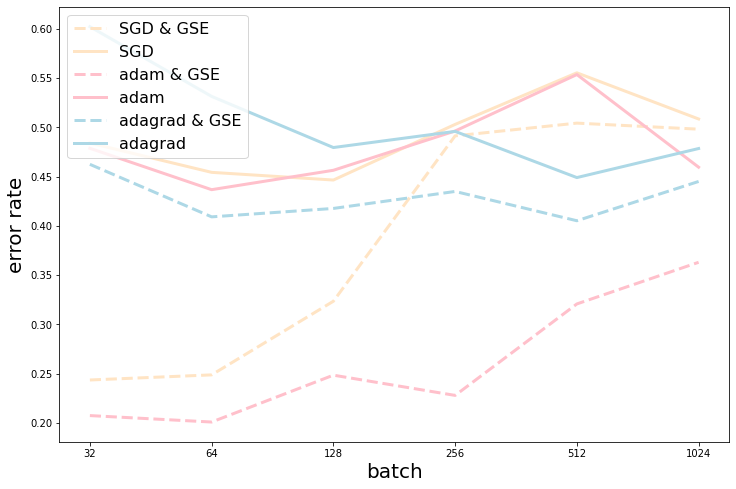

Adult_Income
resnet


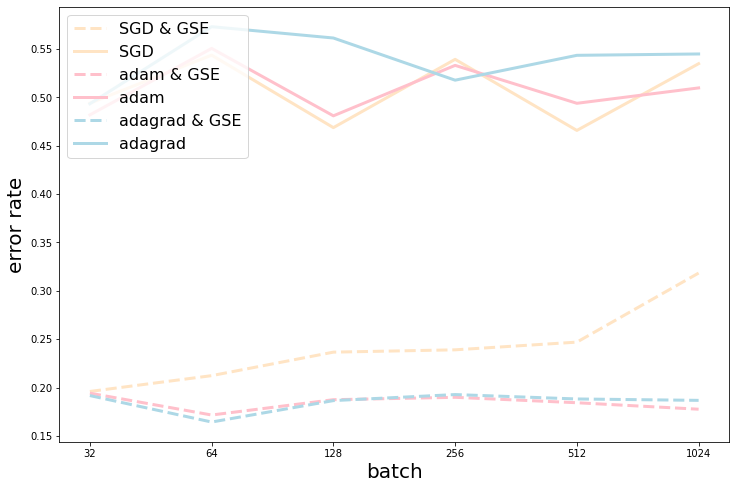

compas
mlp
compas
resnet
Dont_Get_Kicked
mlp


<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

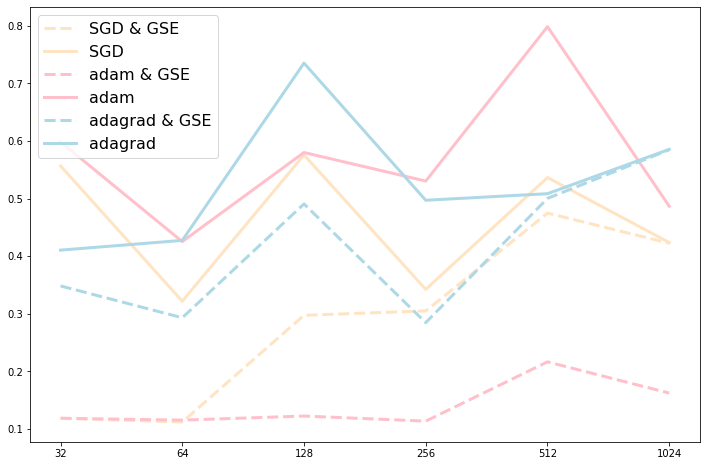

Dont_Get_Kicked
resnet


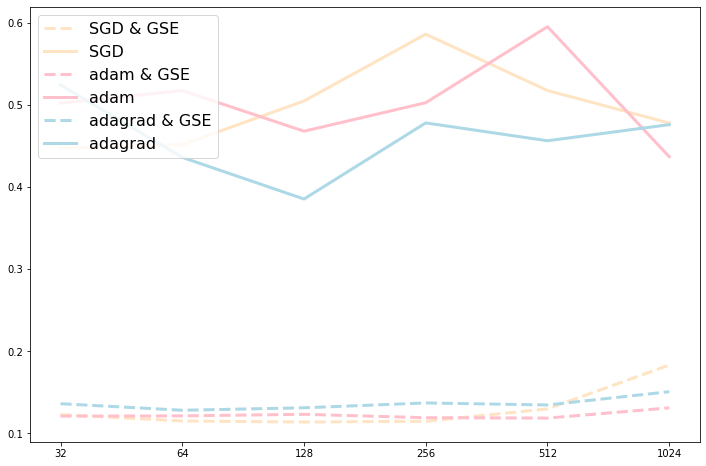

Forest_Cover
mlp


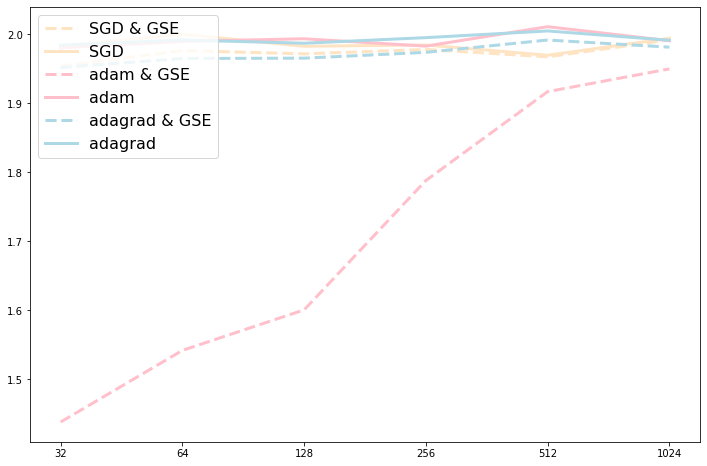

Forest_Cover
resnet


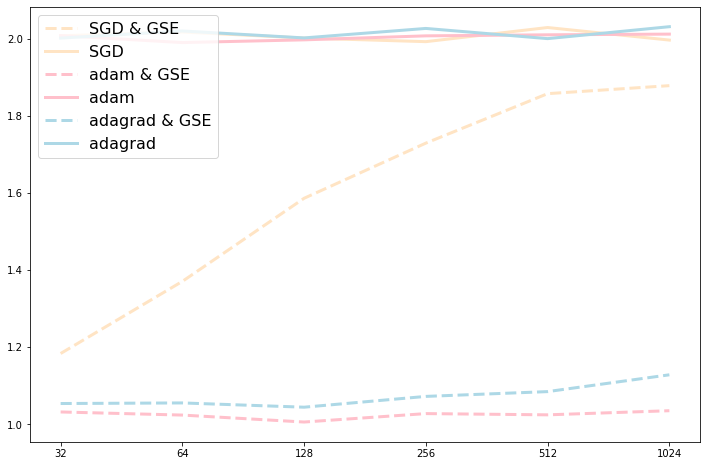

KDD99
mlp


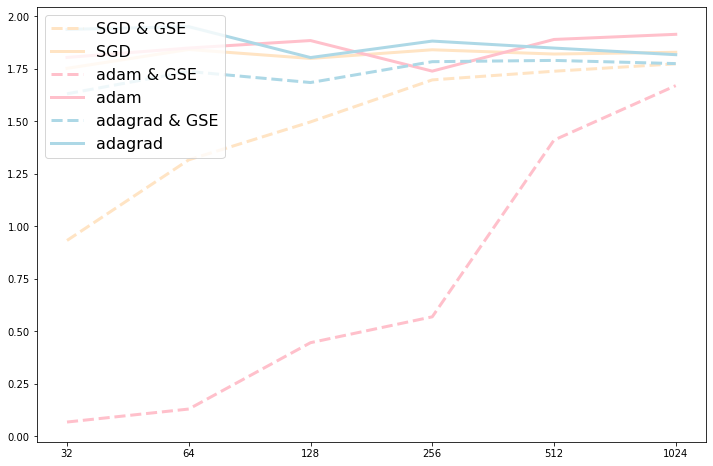

KDD99
resnet


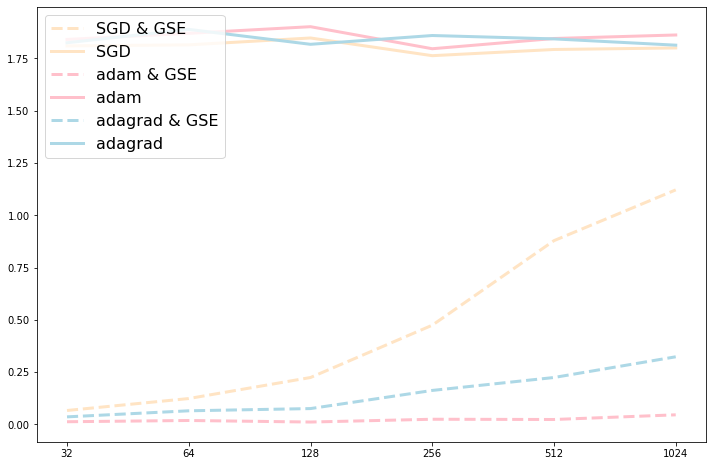

Usedcarcatalog
mlp


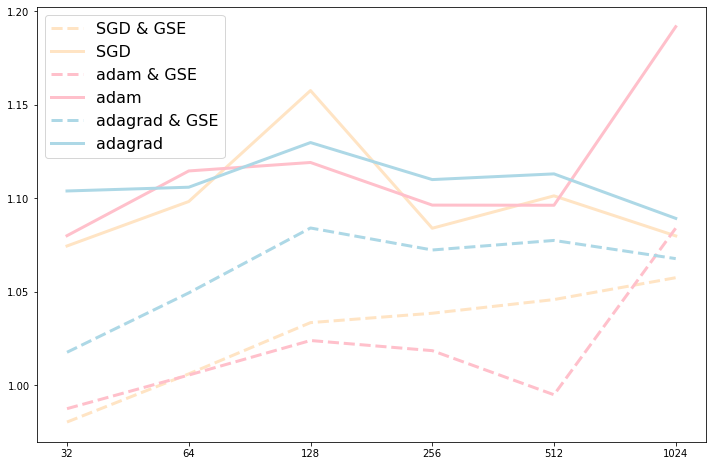

Usedcarcatalog
resnet


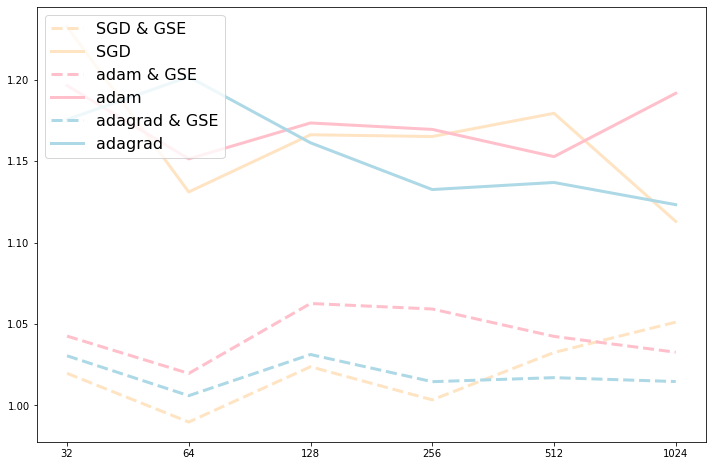

In [7]:
for dataset in curve.keys():
    for model in dta.models:
        print(dataset)
        print(model)
        try:
            plot_curve(curve, dataset, model)
        except:
            pass

In [8]:
curve["compas"]["mlp"]["SGD"]["True"]

{}

In [9]:
dta.colors

['bisque', 'pink', 'lightblue', 'silver', 'bisque', 'fushia', 'crimson']